# Probability of inhibition in spines

In [1]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
%matplotlib inline

## Estimated parameters
These are the values from experiment. Change them accordingly.

In [2]:
EnshPSD = 61
EnDiS = 34
Eninh = EnshPSD+EnDiS
ELdd = 229.4670
EdshPSD = (EnshPSD/ELdd,sqrt(EnshPSD)/ELdd)
EdDis = (EnDiS/ELdd,sqrt(EnDiS)/ELdd)
Edinh = (Eninh/ELdd,sqrt(Eninh)/ELdd)
EPinhPSD = (EnshPSD/Eninh,sqrt(EnshPSD*EnDiS/Eninh**2/Eninh)) # Binomial standard error
EPinhsh = (EnDiS/Eninh,sqrt(EnshPSD*EnDiS/Eninh**2/Eninh))
print("Densitity of inhibitory synapse %.3f +- %.3f syn/um" % Edinh)
print("Probability of synapse in sp head %.3f +- %.3f " % EPinhsh)
print("Probability of synapse in sp shaft %.3f +- %.3f " % EPinhPSD)
Elength =229.4670
Enspines = 375
Ediam = 1.0
Edsp = Enspines/Elength
print("Densitity of spines %.3f +- %.3f spine/um" % (Edsp,sqrt(Enspines)/Elength))

EAhead = 8.
EdiamNS = 0.15
Elengthsp = 1.5
EAinhsyn = 0.2

Densitity of inhibitory synapse 0.414 +- 0.042 syn/um
Probability of synapse in sp head 0.358 +- 0.049 
Probability of synapse in sp shaft 0.642 +- 0.049 
Densitity of spines 1.634 +- 0.084 spine/um


In [3]:
def areabranch(dsp = 1.0, diam = 0.5, length = 10.0,diamNS = 0.15):
    cil_A = diam*pi*length
    sp_A = dsp*length*pi*(diamNS/2.0)**2
    return(cil_A-sp_A)

print("Area of dendritic shaft, spine head, spine neck")
print(areabranch(Edsp,diam=Ediam,length = Elength),Edsp*Elength*EAhead,EdiamNS*pi*Elengthsp)

Area of dendritic shaft, spine head, spine neck
714.2650444376231 3000.0 0.7068583470577035


## Simple estimate - Area ratios.

This is the most simple estimate and it should be constant. And it is! I calculated it for different lengths because at the beggining it was not constant. Now the mistake is solved, I just keep this part to plot it at the end.


In [4]:
lengths = [1,2,3,4,5,7.5,10.,15.,20,30.,40.,50.]
d = zeros((len(lengths),4))
for i,length in enumerate(lengths):
    d[i,:] = (length,areabranch(Edsp,diam=Ediam,length = length,diamNS = 0.0),Edsp*length*EAhead*.7,EdiamNS*pi*Elengthsp*Edsp*length)

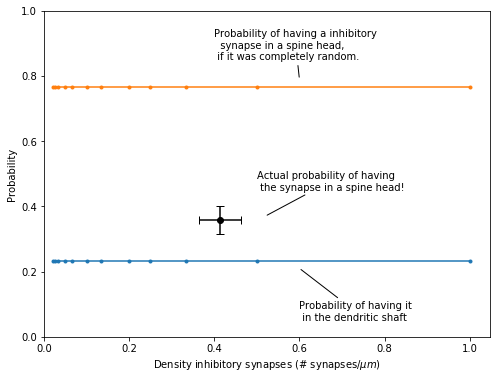

In [14]:
figure(figsize=(8,6))
# probability of having the synapse in the shaft
plot(1.0/d[:,0],d[:,1]/d[:,1:].sum(axis=1),'.-',label='dendritic shaft')
# probability of having the synapse in the spine (both head and neck)
plot(1.0/d[:,0],(d[:,2]+d[:,3])/d[:,1:].sum(axis=1),'.-',label='spine')
#legend()
xlabel("Density inhibitory synapses (# synapses/$\mu m$)")
ylabel("Probability")
errorbar(Edinh[0],EPinhsh[0],Edinh[1],EPinhsh[1],capsize=4.0,c='k',marker='.',markersize=12)

annotate(
    'Actual probability of having\n the synapse in a spine head!',
    xy=(0.52, 0.37), arrowprops=dict(arrowstyle='-'), xytext=(0.5, 0.45))

annotate(
    'Probability of having it\n in the dendritic shaft',
   xy=(0.6, 0.21), arrowprops=dict(arrowstyle='-'),xytext=(0.6, 0.05) )


annotate(
    'Probability of having a inhibitory\n  synapse in a spine head, \n if it was completely random.',
     xy=(0.6, 0.79), arrowprops=dict(arrowstyle='-'), xytext=(0.4, 0.85))

xlim(0,)
ylim(0,1)

savefig("Prob_being_spinehead.png")

In [6]:
dd = 1.0*d
print(dd)

[[  1.           3.14159265   9.15164272   1.1551634 ]
 [  2.           6.28318531  18.30328544   2.3103268 ]
 [  3.           9.42477796  27.45492816   3.4654902 ]
 [  4.          12.56637061  36.60657088   4.6206536 ]
 [  5.          15.70796327  45.7582136    5.77581701]
 [  7.5         23.5619449   68.6373204    8.66372551]
 [ 10.          31.41592654  91.5164272   11.55163401]
 [ 15.          47.1238898  137.2746408   17.32745102]
 [ 20.          62.83185307 183.0328544   23.10326802]
 [ 30.          94.24777961 274.5492816   34.65490203]
 [ 40.         125.66370614 366.06570879  46.20653604]
 [ 50.         157.07963268 457.58213599  57.75817005]]


## Bootstrap.

Here we do a sort of bootstrap calculation. For that we set length of the dendritic piece and other parameters from estimated values and vary the density of inhibitory synapses.

For a given density:
 - nspines: normally-distributed random number  (big number! Otherwise it should be Poissonian) 
             mu+-std = (density*length dendrite) +- sqrt(density*length dendrite) 
 - nsynapse: normally-distributed random number with its density
 - Available area of the spine head is factor=0.7
 - When an inhibitory synapse is placed in a spine, the area of the spine gets substracted from the total available area

(array([   5.,    8.,   14.,   29.,   41.,   79.,  105.,  163.,  264.,
         358.,  443.,  531.,  696.,  800.,  872., 1735.,  777.,  754.,
         617.,  547.,  400.,  253.,  194.,  130.,   80.,   48.,   31.,
          11.,    9.,    4.,    2.]),
 array([ 4.        ,  5.06451613,  6.12903226,  7.19354839,  8.25806452,
         9.32258065, 10.38709677, 11.4516129 , 12.51612903, 13.58064516,
        14.64516129, 15.70967742, 16.77419355, 17.83870968, 18.90322581,
        19.96774194, 21.03225806, 22.09677419, 23.16129032, 24.22580645,
        25.29032258, 26.35483871, 27.41935484, 28.48387097, 29.5483871 ,
        30.61290323, 31.67741935, 32.74193548, 33.80645161, 34.87096774,
        35.93548387, 37.        ]),
 <a list of 31 Patch objects>)

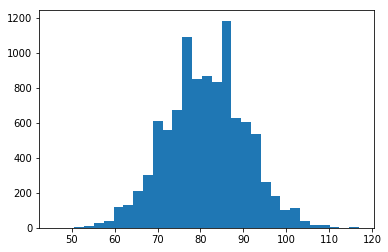

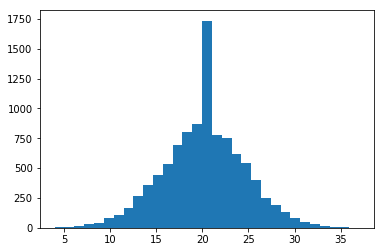

In [7]:
#nspines = array((-log(rand(10000))*Edsp*length)+1,dtype=int)
nspines = array(randn(10000)*sqrt(Edsp*length)+Edsp*length,dtype=int)
nsyn = array(randn(10000)*sqrt(length*Edinh[0])+(length*Edinh[0]),dtype=int)

hist(nspines,31)
figure()
hist(nsyn,31)

In [8]:

ds = 1.0/array([1,2,3,4,5,7.5,10.,15.,20,30.,40.,50.])
length = ELdd
Asyn = EAinhsyn
Ahead = EAhead
diamNS = EdiamNS
lengthsp = Elengthsp
factor = .7


bs = zeros((len(ds),3))
for k,din in enumerate(ds):
    # Area of the dendritic shaft (not removing base of spines)
    Ab00 = areabranch(Edsp,diam=Ediam,length = Elength,diamNS = 0.0)

    pt = zeros(10000)
    Pbm =0.0
    for i in range(10000):
        # Generating random numbers of spines and inh synapses
        nspines = max(int(randn()*sqrt(Edsp*length)+Edsp*length),1)
        nsyn = max(int(randn()*sqrt(length*din)+(length*din)),1)
        
        # Calculating areas
        As0 = nspines*(Ahead*factor)
        An0 = nspines*diamNS*pi*lengthsp
        Ab0 = Ab00-nspines*diamNS**2*pi/4.0
        Pbm += Ab0/(Ab0+An0+As0)/10000.0
        
        Ab = Ab0*1.0
        
        As = As0*1.0
        An = An0*1.0
        sinS = 0.0
        for j in range(nsyn):
            # updated total area
            At = Ab+As+An
            if rand()<(As+An)/At:
                # inh synapse is placed in spine
                sinS +=1.0
                As = As-Ahead*factor
                An = An-diamNS*pi*lengthsp
            else:
                # inh synapse is placed in shaft
                Ab = Ab-Asyn
        pt[i] = sinS/float(nsyn)
    bs[k,:] = [mean(pt),std(pt),Pbm]

In [9]:
areabranch(Edsp,diam=Ediam,length = Elength,diamNS = 0.0),Edsp*length*EAhead*factor,EdiamNS*pi*Elengthsp*Edsp*length

(720.8918414412891, 2100.0, 265.0718801466388)

In [10]:
xt = array([areabranch(Edsp,diam=Ediam,length = Elength,diamNS = 0.0),Edsp*length*EAhead*factor,EdiamNS*pi*Elengthsp*Edsp*length])

xt[0]/xt.sum()

0.2336034725224649

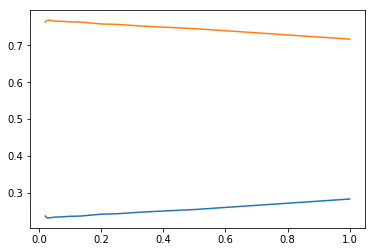

In [11]:
plot(ds,1-bs[:,0])
plot(ds,bs[:,0])
#plot(ds,bs2[:,0])

#plot(ds,1-bs2[:,0])


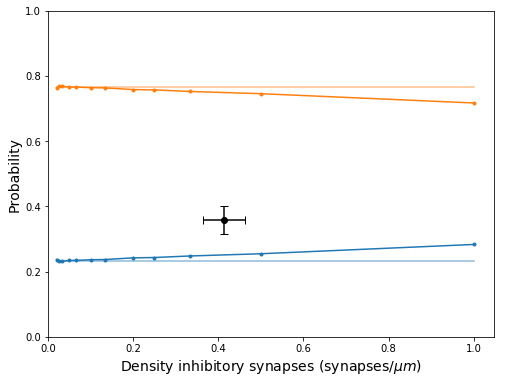

In [12]:
figure(figsize=(8,6))
plot(1.0/dd[:,0],dd[:,1]/dd[:,1:].sum(axis=1),'-',label='dendritic branch',alpha=0.5)
plot(1.0/dd[:,0],(dd[:,2]+dd[:,3])/dd[:,1:].sum(axis=1),'-',label='spine head',alpha=0.5)
plot(ds,1-bs[:,0],'C0.-')
plot(ds,bs[:,0],'C1.-')
#legend()
xlabel("Density inhibitory synapses (synapses/$\mu m$)",fontsize = 14)
ylabel("Probability",fontsize = 14)
errorbar(Edinh[0],EPinhsh[0],Edinh[1],EPinhsh[1],capsize=4.0,c='k',marker='.',markersize=12)



xlim(0,)
ylim(0,1)

savefig("Prob_being_spineheadBs.png")